# Designing Fair Voting Districts Clustering

## Import Statements

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
import geopandas as gpd
import pandas as pd
import fiona 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
from sklearn.cluster import KMeans

## Open Shapefile with Fiona and GeoPandas

In [2]:
 fiona.open('CO_census_block_2017.shp')

<open Collection 'CO_census_block_2017.shp:CO_census_block_2017', mode 'r' at 0x1ea80e6e250>

In [3]:
colorado_init = gpd.read_file('CO_census_block_2017.shp')

##Choose only census blocks in Denver County
colorado = colorado_init.loc[colorado_init['geonum'].isin(['1080319801001',
'1080319800001',
'1080310157004',
'1080310157003',
'1080310157002',
'1080310157001',
'1080310156004',
'1080310156003',
'1080310156002',
'1080310156001',
'1080310155003',
'1080310155002',
'1080310155001',
'1080310154004',
'1080310154003',
'1080310154002',
'1080310154001',
'1080310153003',
'1080310153002',
'1080310153001',
'1080310120144',
'1080310120143',
'1080310120142',
'1080310120141',
'1080310120103',
'1080310120102',
'1080310120101',
'1080310120012',
'1080310120011',
'1080310119032',
'1080310119031',
'1080310119024',
'1080310119023',
'1080310119022',
'1080310119021',
'1080310083912',
'1080310083911',
'1080310083903',
'1080310083902',
'1080310083901',
'1080310083893',
'1080310083892',
'1080310083891',
'1080310083882',
'1080310083881',
'1080310083872',
'1080310083871',
'1080310083862',
'1080310083861',
'1080310083123',
'1080310083122',
'1080310083121',
'1080310083064',
'1080310083063',
'1080310083062',
'1080310083061',
'1080310083053',
'1080310083052',
'1080310083051',
'1080310083043',
'1080310083042',
'1080310083041',
'1080310070894',
'1080310070893',
'1080310070892',
'1080310070891',
'1080310070884',
'1080310070883',
'1080310070882',
'1080310070881',
'1080310070373',
'1080310070372',
'1080310070371',
'1080310070132',
'1080310070131',
'1080310070062',
'1080310070061',
'1080310069015',
'1080310069014',
'1080310069013',
'1080310069012',
'1080310069011',
'1080310068144',
'1080310068143',
'1080310068142',
'1080310068141',
'1080310068133',
'1080310068132',
'1080310068131',
'1080310068123',
'1080310068122',
'1080310068121',
'1080310068114',
'1080310068113',
'1080310068112',
'1080310068111',
'1080310068104',
'1080310068103',
'1080310068102',
'1080310068101',
'1080310068096',
'1080310068095',
'1080310068094',
'1080310068093',
'1080310068092',
'1080310068091',
'1080310068042',
'1080310068041',
'1080310067011',
'1080310055034',
'1080310055033',
'1080310055032',
'1080310055031',
'1080310055021',
'1080310053001',
'1080310052004',
'1080310052003',
'1080310052002',
'1080310052001',
'1080310051042',
'1080310051041',
'1080310051024',
'1080310051023',
'1080310051022',
'1080310051021',
'1080310050025',
'1080310050024',
'1080310050023',
'1080310050022',
'1080310050021',
'1080310050012',
'1080310050011',
'1080310048013',
'1080310048012',
'1080310048011',
'1080310047006',
'1080310047005',
'1080310047004',
'1080310047003',
'1080310047002',
'1080310047001',
'1080310046035',
'1080310046034',
'1080310046033',
'1080310046032',
'1080310046031',
'1080310046024',
'1080310046023',
'1080310046022',
'1080310046021',
'1080310046014',
'1080310046013',
'1080310046012',
'1080310046011',
'1080310045063',
'1080310045062',
'1080310045061',
'1080310045053',
'1080310045052',
'1080310045051',
'1080310045043',
'1080310045042',
'1080310045041',
'1080310045033',
'1080310045032',
'1080310045031',
'1080310044054',
'1080310044053',
'1080310044052',
'1080310044051',
'1080310044043',
'1080310044042',
'1080310044041',
'1080310044033',
'1080310044032',
'1080310044031',
'1080310043065',
'1080310043064',
'1080310043063',
'1080310043062',
'1080310043061',
'1080310043044',
'1080310043043',
'1080310043042',
'1080310043041',
'1080310043034',
'1080310043033',
'1080310043032',
'1080310043031',
'1080310043023',
'1080310043022',
'1080310043021',
'1080310043014',
'1080310043013',
'1080310043012',
'1080310043011',
'1080310042025',
'1080310042024',
'1080310042023',
'1080310042022',
'1080310042021',
'1080310042016',
'1080310042015',
'1080310042014',
'1080310042013',
'1080310042012',
'1080310042011',
'1080310041071',
'1080310041061',
'1080310041046',
'1080310041045',
'1080310041044',
'1080310041043',
'1080310041042',
'1080310041041',
'1080310041036',
'1080310041035',
'1080310041034',
'1080310041033',
'1080310041032',
'1080310041031',
'1080310041024',
'1080310041023',
'1080310041022',
'1080310041021',
'1080310041013',
'1080310041012',
'1080310041011',
'1080310040064',
'1080310040063',
'1080310040062',
'1080310040061',
'1080310040052',
'1080310040051',
'1080310040041',
'1080310040034',
'1080310040033',
'1080310040032',
'1080310040031',
'1080310040024',
'1080310040023',
'1080310040022',
'1080310040021',
'1080310039023',
'1080310039022',
'1080310039021',
'1080310039013',
'1080310039012',
'1080310039011',
'1080310038005',
'1080310038004',
'1080310038003',
'1080310038002',
'1080310038001',
'1080310037032',
'1080310037031',
'1080310037024',
'1080310037023',
'1080310037022',
'1080310037021',
'1080310037012',
'1080310037011',
'1080310036032',
'1080310036031',
'1080310036025',
'1080310036024',
'1080310036023',
'1080310036022',
'1080310036021',
'1080310036015',
'1080310036014',
'1080310036013',
'1080310036012',
'1080310036011',
'1080310035005',
'1080310035004',
'1080310035003',
'1080310035002',
'1080310035001',
'1080310034023',
'1080310034022',
'1080310034021',
'1080310034012',
'1080310034011',
'1080310033004',
'1080310033003',
'1080310033002',
'1080310033001',
'1080310032033',
'1080310032032',
'1080310032031',
'1080310032023',
'1080310032022',
'1080310032021',
'1080310032015',
'1080310032014',
'1080310032013',
'1080310032012',
'1080310032011',
'1080310031022',
'1080310031021',
'1080310031011',
'1080310030043',
'1080310030042',
'1080310030041',
'1080310030032',
'1080310030031',
'1080310030023',
'1080310030022',
'1080310030021',
'1080310030015',
'1080310030014',
'1080310030013',
'1080310030012',
'1080310030011',
'1080310029023',
'1080310029022',
'1080310029021',
'1080310029013',
'1080310029012',
'1080310029011',
'1080310028034',
'1080310028033',
'1080310028032',
'1080310028031',
'1080310028024',
'1080310028023',
'1080310028022',
'1080310028021',
'1080310028013',
'1080310028012',
'1080310028011',
'1080310027034',
'1080310027033',
'1080310027032',
'1080310027031',
'1080310027025',
'1080310027024',
'1080310027023',
'1080310027022',
'1080310027021',
'1080310027014',
'1080310027013',
'1080310027012',
'1080310027011',
'1080310026021',
'1080310026012',
'1080310026011',
'1080310024033',
'1080310024032',
'1080310024031',
'1080310024022',
'1080310024021',
'1080310023003',
'1080310023002',
'1080310023001',
'1080310021005',
'1080310021004',
'1080310021003',
'1080310021002',
'1080310021001',
'1080310020001',
'1080310019021',
'1080310019012',
'1080310019011',
'1080310018002',
'1080310018001',
'1080310017022',
'1080310017021',
'1080310017015',
'1080310017014',
'1080310017013',
'1080310017012',
'1080310017011',
'1080310016003',
'1080310016002',
'1080310016001',
'1080310015003',
'1080310015002',
'1080310015001',
'1080310014032',
'1080310014031',
'1080310014024',
'1080310014023',
'1080310014022',
'1080310014021',
'1080310014015',
'1080310014014',
'1080310014013',
'1080310014012',
'1080310014011',
'1080310013023',
'1080310013022',
'1080310013021',
'1080310013015',
'1080310013014',
'1080310013013',
'1080310013012',
'1080310013011',
'1080310011023',
'1080310011022',
'1080310011021',
'1080310011014',
'1080310011013',
'1080310011012',
'1080310011011',
'1080310010003',
'1080310010002',
'1080310010001',
'1080310009054',
'1080310009053',
'1080310009052',
'1080310009051',
'1080310009044',
'1080310009043',
'1080310009042',
'1080310009041',
'1080310009035',
'1080310009034',
'1080310009033',
'1080310009032',
'1080310009031',
'1080310009025',
'1080310009024',
'1080310009023',
'1080310009022',
'1080310009021',
'1080310008001',
'1080310007025',
'1080310007024',
'1080310007023',
'1080310007022',
'1080310007021',
'1080310007013',
'1080310007012',
'1080310007011',
'1080310006002',
'1080310006001',
'1080310005025',
'1080310005024',
'1080310005023',
'1080310005022',
'1080310005021',
'1080310005012',
'1080310005011',
'1080310004026',
'1080310004025',
'1080310004024',
'1080310004023',
'1080310004022',
'1080310004021',
'1080310004014',
'1080310004013',
'1080310004012',
'1080310004011',
'1080310003036',
'1080310003035',
'1080310003034',
'1080310003033',
'1080310003032',
'1080310003031',
'1080310003025',
'1080310003024',
'1080310003023',
'1080310003022',
'1080310003021',
'1080310003016',
'1080310003015',
'1080310003014',
'1080310003013',
'1080310003012',
'1080310003011',
'1080310002024',
'1080310002023',
'1080310002022',
'1080310002021',
'1080310002012',
'1080310002011',
'1080310001023',
'1080310001022',
'1080310001021'])]
pop_col = colorado['pop']
pop_reset= pop_col.reset_index(drop=True)

## Open CSV wtih Lat/Long for Possible Voting Locations

In [4]:
pol_locs = pd.read_csv('inPersonPolling.csv')
lat_long = pol_locs[['Lat','Long']].to_numpy()
# creating a geometry column 
geometry = [Point(xy) for xy in zip(pol_locs['Long'], pol_locs['Lat'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(pol_locs, crs=crs, geometry=geometry)

## Find Centers of Voting Places Via KMeans Clusterings

In [5]:
kmeans = KMeans(n_clusters=11, random_state=0).fit(lat_long)
kmeans.labels_
kmeans.cluster_centers_
voting_geometry = [Point(xy) for xy in zip(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0])]
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
voting_centers = gpd.GeoDataFrame(kmeans.cluster_centers_, crs=crs, geometry=voting_geometry)

## Plot of Colorado Census Blocks with coloring based on Population

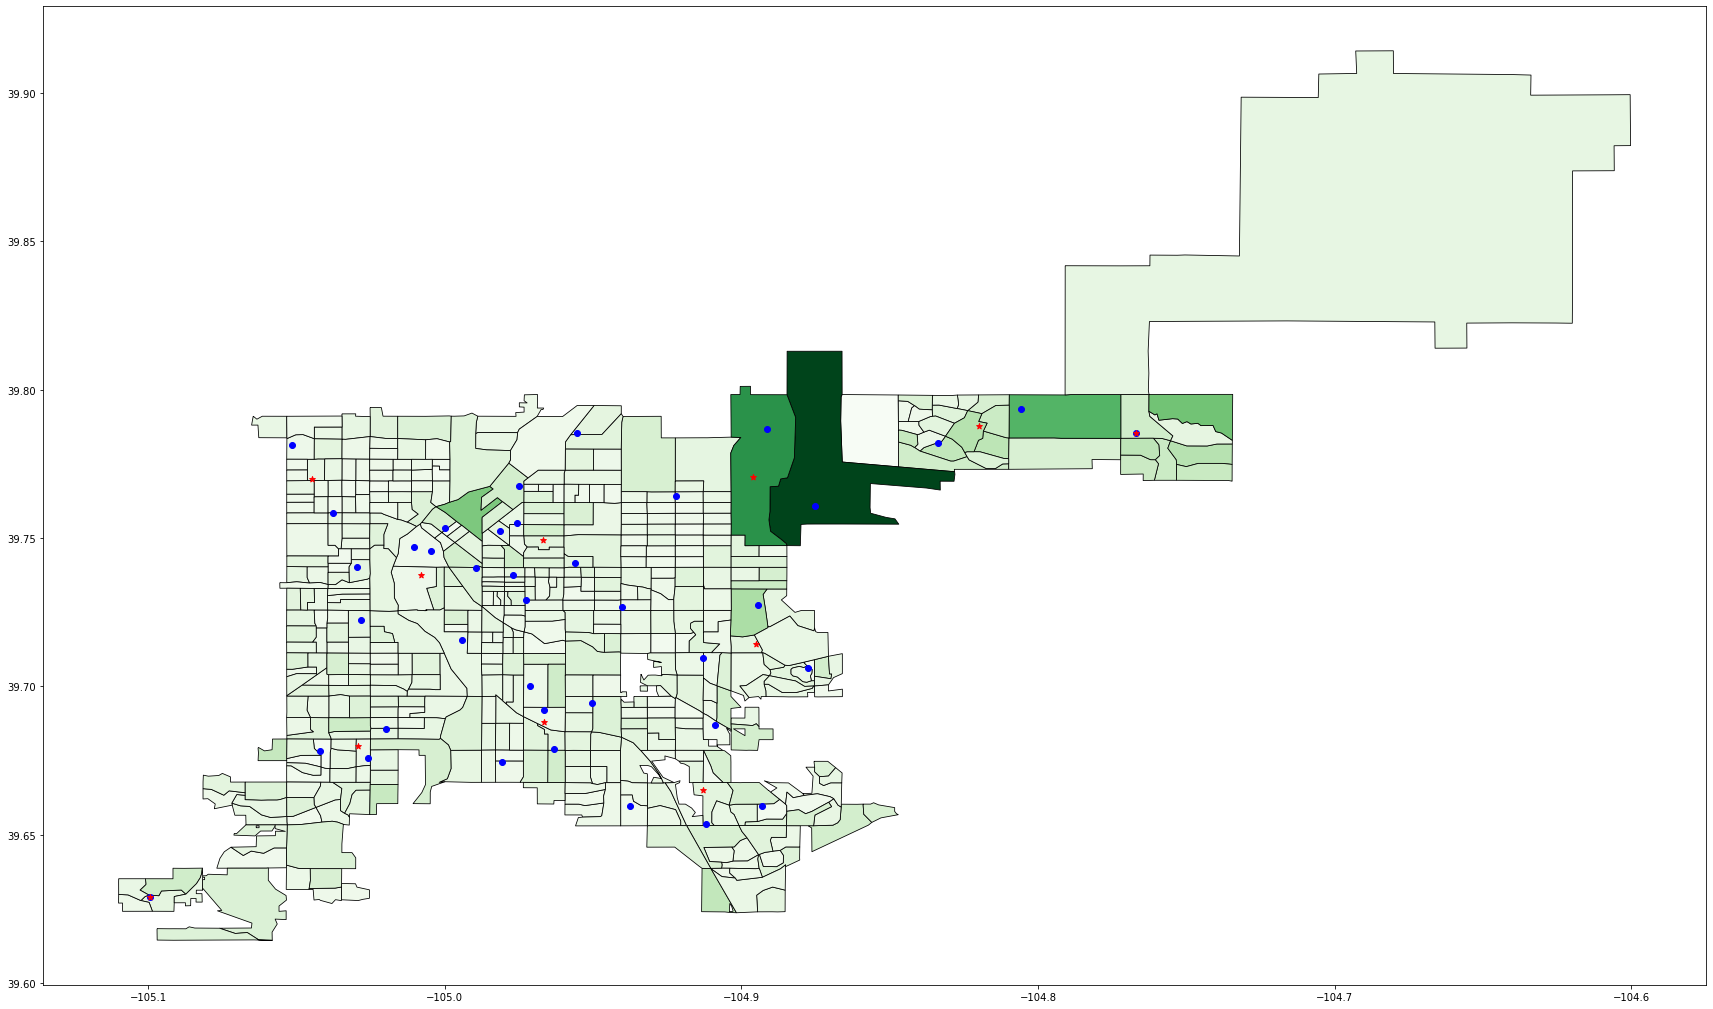

In [6]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'pop'
#variable = 'POPULATION'

# set the range for the choropleth
vmin, vmax = colorado['pop'].min(), colorado['pop'].max()
#vmin, vmax = colorado['POPULATION'].min(), colorado['POPULATION'].max()

# create figure and axes for Matplotlib
# fig, ax = plt.subplots(1, figsize=(20, 12))
ax = colorado.plot(column=variable, cmap='Greens', linewidth=0.8, edgecolor='black', figsize=(30, 18))

x, y = pol_locs['Long'].values, pol_locs['Lat'].values
w, v = kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]
ax.scatter(x,y, marker="o", color='b')
ax.scatter(w,v, marker="*", color='r')
# gdf.plot(marker='o')

plt.show()

###Gotta fix this to get colorboar to show up with plot
# # Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = colorado.colorbar(sm)



## Center of Each Census Block

In [7]:
from shapely.wkt import loads as load_wkt
centers = colorado['geometry'].centroid
print(centers.loc[:])

2       POINT (-104.75700 39.77557)
8       POINT (-105.03697 39.76673)
22      POINT (-104.95473 39.68793)
31      POINT (-105.04365 39.68518)
48      POINT (-105.04971 39.73770)
                   ...             
3505    POINT (-104.93634 39.74557)
3515    POINT (-105.04525 39.78827)
3517    POINT (-104.99087 39.77655)
3518    POINT (-104.98446 39.72141)
3529    POINT (-104.89404 39.77591)
Length: 481, dtype: geometry


## Create Matrix of Distances Between Census Blocks and Voting Locations

### Reindexing centroid data

In [8]:
centers = centers.reset_index(drop=True)
print(centers)

0      POINT (-104.75700 39.77557)
1      POINT (-105.03697 39.76673)
2      POINT (-104.95473 39.68793)
3      POINT (-105.04365 39.68518)
4      POINT (-105.04971 39.73770)
                  ...             
476    POINT (-104.93634 39.74557)
477    POINT (-105.04525 39.78827)
478    POINT (-104.99087 39.77655)
479    POINT (-104.98446 39.72141)
480    POINT (-104.89404 39.77591)
Length: 481, dtype: geometry


### Calculating distance between all points and storing in matrix

In [9]:
dist = np.zeros((len(voting_centers),len(centers)))

for i in range(0,len(voting_centers)):
    for j in range(0,len(centers)):
        dist[i,j] = voting_centers.loc[i,'geometry'].distance(centers.loc[j])


In [10]:
print(dist)
rows = len(dist)
columns = len(dist[0])
print(rows)
print(columns)

[[0.28765387 0.00823641 0.12159391 ... 0.05414139 0.07721512 0.15068123]
 [0.15088031 0.15139419 0.06540667 ... 0.11433667 0.08981997 0.06154   ]
 [0.21132806 0.07234055 0.06272287 ... 0.03627102 0.03322449 0.07732795]
 ...
 [0.22697579 0.10575004 0.01165859 ... 0.09189425 0.03800158 0.11387818]
 [0.13927027 0.14084264 0.10139934 ... 0.0948666  0.10111183 0.00562427]
 [0.2539251  0.04095395 0.07296037 ... 0.04249514 0.02869562 0.12027978]]
11
481


## LP for the Voting District Clusters

In [12]:
'''
read in districts, distances, and pop
'''
districts = 11
pop = pop_reset.tolist()
print(type(pop))
dist = dist

coeffs = get_coeffs(dist, pop)
#print('coeffs: ', coeffs)
print('coeff shape: ',coeffs.shape)
print()

pop_constrs = pop_constraint(districts, pop)
ones = np.ones(len(pop))
eq = np.concatenate((pop_constrs, ones), axis = 0)
#print('equality: ', eq)
print('eq shape:', eq.shape)
print()

A = build_constraint_matrix(districts, pop)
print('A shape:', A.shape)
print()

#print('constraints: ', A)
print(optimize.linprog(coeffs, A_eq = A, b_eq = eq, bounds = [0,1]))

<class 'list'>
(11, 481)
(481,)
coeff shape:  (5291,)

eq shape: (492,)

pop const mat: (11, 5291)
sum const mat: (481, 5291)
A shape: (492, 5291)
492
5291


<ipython-input-12-c44f38c7718a>:29: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  print(optimize.linprog(coeffs, A_eq = A, b_eq = eq, bounds = [0,1]))


     con: array([-5.21510810e-06, -5.21601032e-06, -5.21630136e-06, -5.21202310e-06,
       -5.21620677e-06, -5.21576294e-06, -5.21385664e-06, -5.21540642e-06,
       -5.21608308e-06, -5.21607581e-06, -5.21828042e-06, -8.45674641e-11,
       -8.45707948e-11, -8.45679082e-11, -8.46511750e-11, -8.45821191e-11,
       -8.45670201e-11, -8.45679082e-11, -8.45667980e-11, -8.45690185e-11,
       -8.44957437e-11, -8.45670201e-11, -8.45705728e-11, -8.45670201e-11,
       -8.45605808e-11, -8.46018811e-11, -8.45630233e-11, -8.45623571e-11,
       -8.45561399e-11, -8.45579162e-11, -8.45674641e-11, -8.45563619e-11,
       -8.45667980e-11, -8.45123971e-11, -8.45574721e-11, -8.45659098e-11,
       -8.45665760e-11, -8.45670201e-11, -8.45805648e-11, -8.45667980e-11,
       -8.45659098e-11, -8.45674641e-11, -8.45670201e-11, -8.45656878e-11,
       -8.45610248e-11, -8.44824211e-11, -8.45679082e-11, -8.45676862e-11,
       -8.45667980e-11, -8.45594705e-11, -8.45827852e-11, -8.45576942e-11,
       -8.45656

In [11]:
import numpy as np
from scipy import optimize
from numpy.linalg import matrix_power

'''
coeffs of optimization are the weights multiplied by 
the square distances. Function takes in a list of 
distances and the assciated population list.
returns (1, k*n) array 
Maybe use a distionary for this
''' 

def get_coeffs(dist, pop):
# 	dist_arr = np.array(dist)
	dist_arr = dist
	print(dist_arr.shape)
	pop_arr = np.array(pop)
	print(pop_arr.shape)
# 	print(np.square(dist_arr))
	coeffs = np.power(dist_arr, 2)*(pop)
# 	coeffs = np.square(dist_arr).dot((pop))
	coeffs = coeffs.flatten()
	return coeffs

'''
input the number of districts and the size of each district, 
districts = int
pop = list of population sizes for each census block
return = array
'''

def pop_constraint(districts, pop):
# 	num_districts = len(districts)
	num_districts = districts
	size = (1.0/num_districts)*np.sum(pop)
	arr = size*np.ones(num_districts)
	return arr

'''
input polling locations (list)
input populations of each census block (list)
forms a matrix that enforces populations to sum limit
w1x(1,1) + ... + wkx(1,k) = P
returns an array
'''

def build_pop_constraints(districts, pop):
	pop_len = len(pop)
# 	num_rows = len(districts)
	num_rows = districts
	num_cols = num_rows*pop_len
	cons_mat = np.zeros((num_rows, num_cols))
	for i in range(num_rows):
		cons_mat[i, i*pop_len:(i+1)*pop_len] = pop[:]
	print('pop const mat:', cons_mat.shape)        
	return cons_mat

'''
input polling locations (list)
input populations of each census block (list)
builds sum constraint matrix for x(i,j) so that they sum to 1
returns array
'''

def build_sum_constraints(districts, pop):
	pop_len = len(pop)
# 	num_dist = len(districts)
	num_dist = districts
	num_rows = len(pop)
	num_cols = num_dist*pop_len
	cons_mat = np.zeros((num_rows, num_cols))
	for i in range(num_rows):
		cons_mat[i, i:num_cols:pop_len] = 1
	print('sum const mat:', cons_mat.shape)
	return cons_mat

def build_constraint_matrix(districts, pop):
	A_top = build_pop_constraints(districts, pop)
	A_bot = build_sum_constraints(districts, pop)
	constraints = np.concatenate((A_top, A_bot), axis = 0)
	return constraints

# Finding Power Diagram
In this section we will find the power diagram by finding all separating hyperplanes. 

In [ ]:
'''
Computes s_ij's from steffen's paper 
input a list (l x 2) of site loactions
return a (l x l x 2) matrix of normalized site directions
s_ij = [a,b] the unit vector that points at s_i from s_j
'''

def compute_site_directions(sites):
	l = len(sites)
	sites = np.array(sites)
	site_directions = np.zeros((l,l,2))
	for i in range(l):
		for j in range(l):
			if i == j:
				site_directions[i,j] = 0
			else:
				x = sites[j] - sites[i]
				x = x/(np.sqrt(x.dot(x)))
				site_directions[i,j] = x
	return site_directions

'''
sigma_ij = max{s_ij * x | x in cluster i}
input : blocks {k x 2 matrix}
clusters {list (reshape to l x k matrix), c_ij is proportion of block j assigned
to site i} 
site_directions {l x l x 2 matrix, see above}
return sigmas {l x l matrix of floats}

'''

def get_sigmas(clusters, site_directions, blocks):
	(a,b,c) = site_directions.shape
	sigmas = np.zeros((a,b)) 
	k = len(blocks)
	for i in range(a):
		for j in range(b):
			sigma_candidates = []
			for alpha in range(k):
				if clusters[i][alpha] > .00001:
					x = site_directions[i,j].dot(blocks[alpha])
					sigma_candidates.append(x)
			sigma = np.amax(sigma_candidates)
			sigmas[i, j] = sigma
	sigmas = sigmas.reshape(sigmas.size, -1)
	return sigmas

'''
Builds the constraint matrix for the LP
input sigmas - list of previously computed sigma values
output matrix, mat, where mat[i,0] = 1, mat[i, i+1] = -1
dim(mat) = (len(sigmas), len(sigmas) + 1)
'''


def build_constraints(sigmas):
	k = len(sigmas)
	mat = np.zeros((k, k+1))
	mat[:,0] = 1
	for i in range(k):
		mat[i, i+1] = -1
	return mat

'''
Input clusters, sites, and census blocks.
Return a matrix of size num_sites x num_sites
a_ij = (s_ij, gamma_ij)
'''

def get_hyperplanes(clusters, sites, blocks):
	l = len(sites)
	site_directions = compute_site_directions(sites)
	sigmas = get_sigmas(clusters, site_directions, blocks)
	constraint_matrix = build_constraints(sigmas)
	coeffs = np.zeros((l*l)+1)
	coeffs[0] = 1
	res = optimize.linprog(c = coeffs, A_eq = constraint_matrix, b_eq = -1*sigmas)
	site_directions_flat = site_directions.reshape(l*l,2)
	k = len(site_directions_flat)
	hyperplanes = np.zeros((k,3))
	gammas = res.x.flatten()
	for i in range(k):
		val = np.append(site_directions_flat[i],(res.x[i]))
		hyperplanes[i] = val
	return hyperplanes
